# Group Project Proposal

### *Group24: Haibin Yu, Eric Zhang, Muhan Yang, Shuhao Zhang*

## Title

An observation into testing the existence of gender inequality between the wages of men and women in Canada in 2016.

## Introduction

## Preliminary Results

In [123]:
library(tidyverse)
library(broom)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(haven)

In [124]:
read_dta("data/01_census2016.dta") -> data

In [125]:
glimpse(data)

Rows: 391,938
Columns: 16
$ ppsort  <dbl> 453141, 732612, 143665, 52611, 36927, 268123, 700087, 488335, …
$ agegrp  <dbl+lbl> 11, 12, 15, 14,  8, 11, 11, 11, 12,  8, 15, 11,  9, 14,  8…
$ ageimm  <dbl+lbl> 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,  2, 99, 99, 99…
$ cip2011 <dbl+lbl>  8,  6,  5, 11, 13, 13,  4, 13,  4, 13, 13,  7,  5, 13, 13…
$ fol     <dbl+lbl> 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1…
$ hdgree  <dbl+lbl>  4,  9,  6,  3,  2,  2,  9,  2,  7,  2,  2,  9,  7,  2,  2…
$ immstat <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1…
$ kol     <dbl+lbl> 1, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1…
$ lfact   <dbl+lbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ locstud <dbl+lbl>  6,  6,  2,  5, 99, 99,  6, 99,  6, 99, 99,  7,  7, 99, 99…
$ mrkinc  <dbl> 97000, 41000, 30000, 54000, 27000, 40000, 69000, 56000, 3000, …
$ pkids   <dbl+lbl> 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 9, 1, 9, 9, 9, 1, 1, 1, 0, 1…
$ pr      <dbl

In [126]:
# filter data with columns needed and filter out NA values for wages
data <- data %>%
    select(sex, wages)
head(data)

sex,wages
<dbl+lbl>,<dbl>
2,95000
1,19000
1,29000
2,52000
2,27000
2,57000


In [127]:
# convert sex from numeric form into categorical form for plotting later
data <- data%>% 
    mutate(sex = factor(sex, labels = c("male", "female"))) 
head(data)

sex,wages
<fct>,<dbl>
female,95000
male,19000
male,29000
female,52000
female,27000
female,57000


Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 56980 rows containing non-finite values (stat_boxplot).”


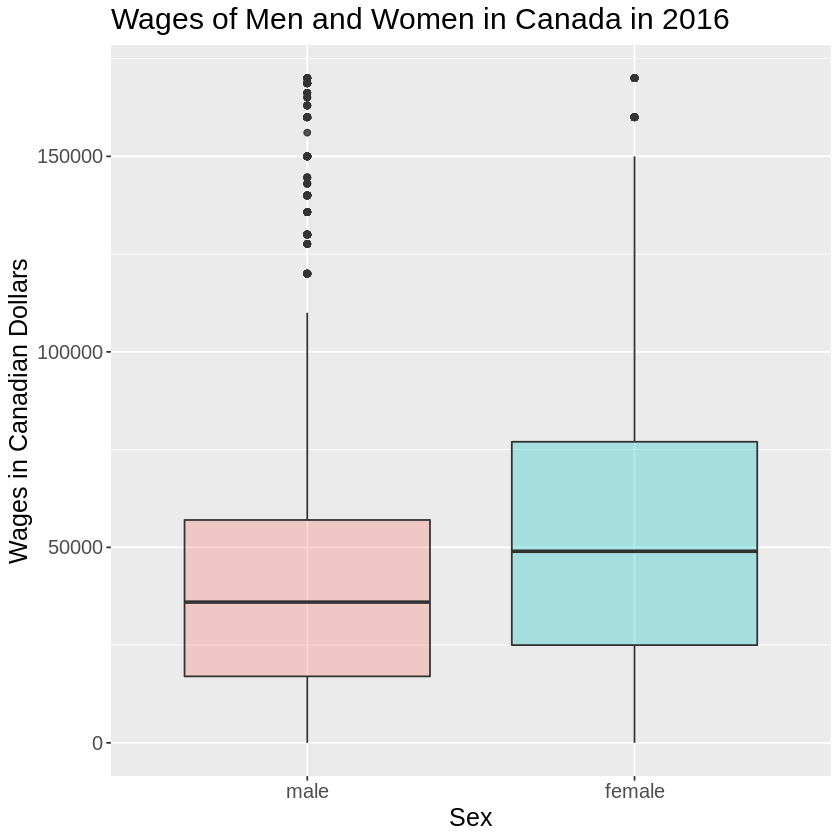

In [128]:
# using boxplot to plot the relevant raw data, as it helps to get a glimpse of the wage range of each sex and compare sample statistics
  # like mean and interquartile range between two groups


data <- 
    data %>% 
    filter(sex %in% c("male", "female"))

sex_wages_boxplots <- data %>% 
    ggplot() +
    geom_boxplot(aes(sex, wages, fill = sex),
                alpha = 0.3) + # change transparency of colours
    ylim(0,170000) + # find a suitable limit for wages (y-axis) after looking the graph with outliers beforehand
    theme(text = element_text(size = 15)) +
    ggtitle("Wages of Men and Women in Canada in 2016") + 
    xlab("Sex") + 
    ylab("Wages in Canadian Dollars") +
    guides(fill = FALSE)

sex_wages_boxplots

In [129]:
# filter out all NA values for wages, compute estimates of the parameter in the following table of summary 
# including mean, variance, and number of people for both sexes

data_summary <- data %>%
    filter(!is.na(wages)) %>%
    group_by(sex) %>%
    summarize(mean = mean(wages),
             var = var(wages),
             n = n())

data_summary

sex,mean,var,n
<fct>,<dbl>,<dbl>,<int>
male,43627.56,1500301770,165710
female,64624.87,6376656749,177353


## Methods: Plan

## References